In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import ruptures as rpt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

### Detecting Change Points on the global CO2 dataset

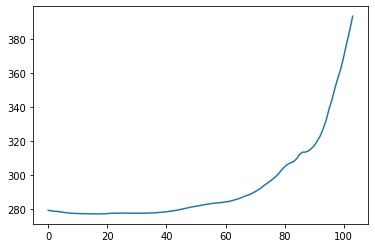

In [2]:
glob_co = pd.read_csv("/home/aumaron/Desktop/other_projects/datasets/time_series/global_co2.csv")
plt.plot(glob_co["t"], glob_co["Mean"])

In [3]:
def get_changepoints(signal, minimum_size=10):

    # Linear model with only beta_0 (theoretically identical to the L2 model)
    linear_signal = np.column_stack((signal, np.ones(signal.shape[0]), np.linspace(1, signal.shape[0], signal.shape[0])))
    _cost = rpt.costs.CostLinear()
    # detection
    algo = rpt.Pelt(custom_cost=_cost, min_size=minimum_size).fit(linear_signal)
    result = algo.predict(pen=np.log(signal.shape[0])*2)

    # print(f"Execution time -> {time.time() - start_time:.3f} s")
    print(f"BreakPoints for min_size {minimum_size} -> ", result)

    # display
    rpt.display(signal, result)
    plt.show()
    
    return linear_signal, result
    
def regression_between_points(signal, 
                              lower_limit, 
                              upper_limit):
    # Linear Regression
    signal_to_fit = signal[lower_limit: upper_limit]
    model = linear_model.LinearRegression()
    target = signal_to_fit[:, 0]
    features = signal_to_fit[:, 1:]
    model.fit(features, target)
    predict = model.predict(features)
    coef = model.coef_
    intercept = model.intercept_
#     mse = mean_squared_error(y_test, pred, squared=False)
        
    return predict, coef, intercept

### Detecting Change Points on the global CO2 dataset

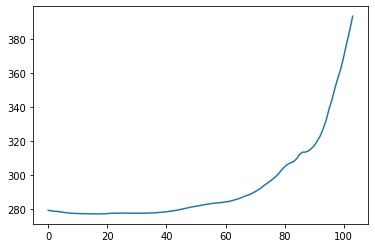

In [4]:
glob_co = pd.read_csv("/home/aumaron/Desktop/other_projects/datasets/time_series/global_co2.csv")
plt.plot(glob_co["t"], glob_co["Mean"])

BreakPoints for min_size 10.0 ->  [35, 70, 90, 104]


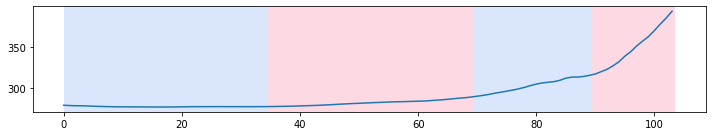

BreakPoints for min_size 20.0 ->  [35, 60, 80, 104]


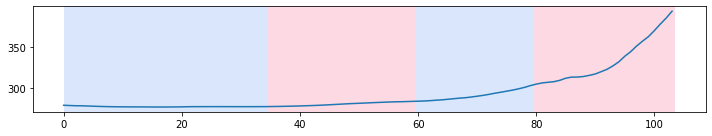

BreakPoints for min_size 30.0 ->  [35, 70, 104]


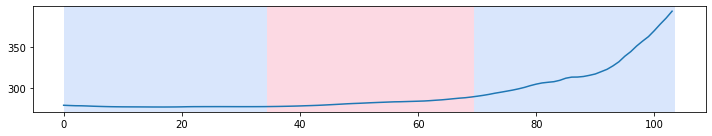

BreakPoints for min_size 40.0 ->  [60, 104]


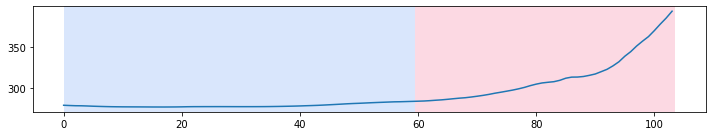

BreakPoints for min_size 50.0 ->  [50, 104]


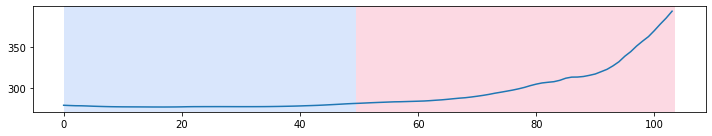

In [5]:
for size in np.linspace(10, 50, 5):
    get_changepoints(signal = glob_co["Mean"].values,
                    minimum_size=size)

### Detecting Change Points on the Nile dataset

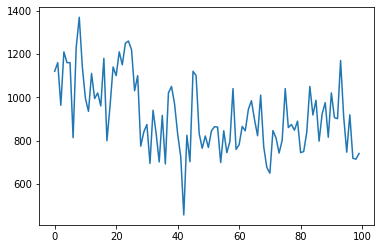

In [6]:
nile = pd.read_csv("/home/aumaron/Desktop/other_projects/datasets/time_series/nile.csv")
plt.plot(nile["t"], nile["Volume at Aswan"])

BreakPoints for min_size 10.0 ->  [10, 25, 35, 45, 55, 65, 75, 90, 100]


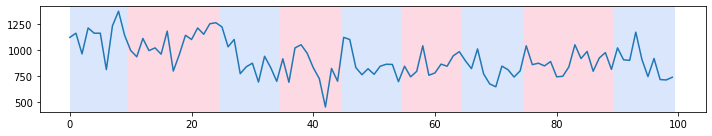

BreakPoints for min_size 20.0 ->  [20, 45, 75, 100]


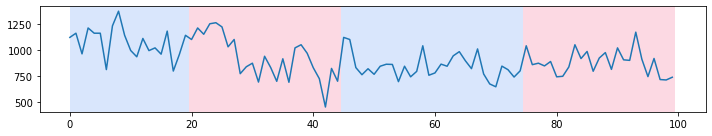

BreakPoints for min_size 30.0 ->  [30, 65, 100]


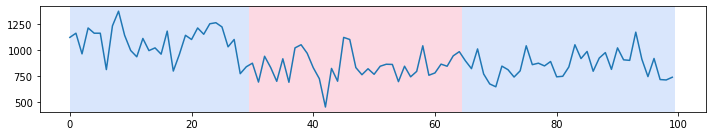

BreakPoints for min_size 40.0 ->  [40, 100]


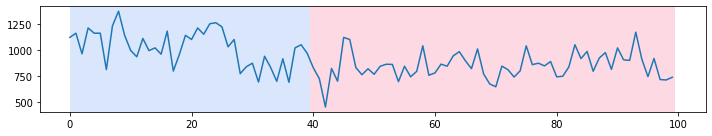

BreakPoints for min_size 50.0 ->  [50, 100]


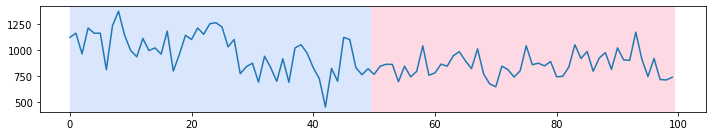

In [7]:
for size in np.linspace(10, 50, 5):
    get_changepoints(signal = nile["Volume at Aswan"].values,
                    minimum_size=size)

### Heuristics for Global CO2

After a visual assessment finalising min_sizes to be 30

BreakPoints for min_size 40 ->  [60, 104]


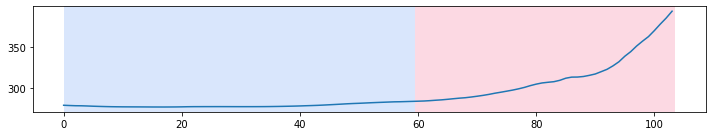

In [12]:
# min_size=30
lin_sig, change_points = get_changepoints(signal=glob_co["Mean"].values, minimum_size=40)

Coefficients for 0 to 60 -> [0.         0.08909705]
Angle for 0 to 60 -> [0.         5.09144075]
Intercept for 0 to 60 -> 276.0309434771862

Coefficients for 61 to 104 -> [0.         2.16954559]
Angle for 61 to 104 -> [ 0.         65.25379463]
Intercept for 61 to 104 -> 134.76356222040988



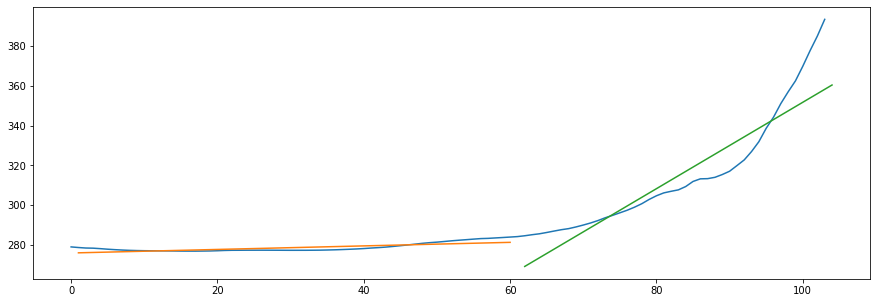

In [6]:
# Fitting regression lines between change points
plt.figure(figsize=(15,5))
plt.plot(glob_co["t"], glob_co["Mean"])

predi = {}
mse_ = {}
prev_change = 0
for i, each_change_point in enumerate(change_points):
    if prev_change == 0:
        pred, coef, intercept = regression_between_points(signal=lin_sig, lower_limit=prev_change, upper_limit=each_change_point)
        predi.update({f"pred{i}": pred})
        plt.plot(lin_sig[:each_change_point, 2], pred)
        print(f"Coefficients for {prev_change} to {each_change_point} -> {coef}")
        print(f"Angle for {prev_change} to {each_change_point} -> {np.arctan(coef)*180/np.pi}")
        print(f"Intercept for {prev_change} to {each_change_point} -> {intercept}\n")
        prev_change = each_change_point + 1
        
        
    else:
        pred, coef, intercept = regression_between_points(signal=lin_sig, lower_limit=prev_change, upper_limit=each_change_point)
        predi.update({f"pred{i}": pred})
        plt.plot(lin_sig[prev_change:each_change_point, 2], pred)
        print(f"Coefficients for {prev_change} to {each_change_point} -> {coef}")
        print(f"Angle for {prev_change} to {each_change_point} -> {np.arctan(coef)*180/np.pi}")
        print(f"Intercept for {prev_change} to {each_change_point} -> {intercept}\n")
        prev_change = each_change_point + 1


### Heuristics for Nile

BreakPoints for min_size 40 ->  [40, 100]


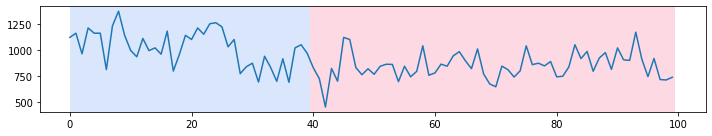

In [10]:
# min_size=30
lin_sig, change_points = get_changepoints(signal=nile["Volume at Aswan"].values, minimum_size=40)

Coefficients for 0 to 40 -> [-6.68667917]
Angle for 0 to 40 -> [-81.49439205]
Intercept for 0 to 40 -> 1163.076923076923

Coefficients for 41 to 100 -> [1.30058445]
Angle for 41 to 100 -> [52.44385305]
Intercept for 41 to 100 -> 756.200876680304



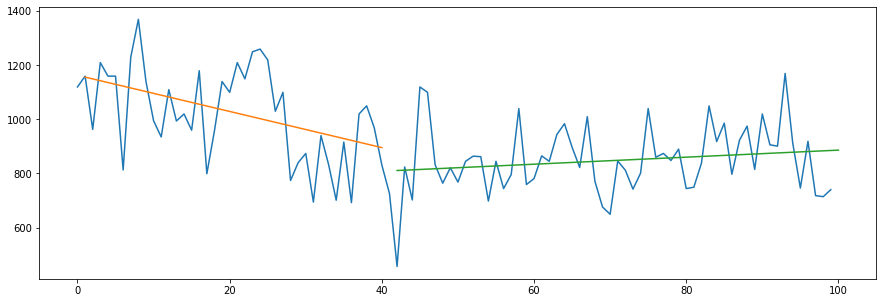

In [11]:
# Fitting regression lines between change points
plt.figure(figsize=(15,5))
plt.plot(nile["t"], nile["Volume at Aswan"])

predi = {}
mse_ = {}
prev_change = 0
for i, each_change_point in enumerate(change_points):
    if prev_change == 0:
        pred, coef, intercept = regression_between_points(signal=lin_sig, lower_limit=prev_change, upper_limit=each_change_point)
        predi.update({f"pred{i}": pred})
        plt.plot(lin_sig[:each_change_point, 2], pred)
        print(f"Coefficients for {prev_change} to {each_change_point} -> {coef}")
        print(f"Angle for {prev_change} to {each_change_point} -> {np.arctan(coef)*180/np.pi}")
        print(f"Intercept for {prev_change} to {each_change_point} -> {intercept}\n")
        prev_change = each_change_point + 1
        
        
    else:
        pred, coef, intercept = regression_between_points(signal=lin_sig, lower_limit=prev_change, upper_limit=each_change_point)
        predi.update({f"pred{i}": pred})
        plt.plot(lin_sig[prev_change:each_change_point, 2], pred)
        print(f"Coefficients for {prev_change} to {each_change_point} -> {coef}")
        print(f"Angle for {prev_change} to {each_change_point} -> {np.arctan(coef)*180/np.pi}")
        print(f"Intercept for {prev_change} to {each_change_point} -> {intercept}\n")
        prev_change = each_change_point + 1


     Unnamed: 0    t  Number of Passengers
0             0    0             1487588.0
1             1    1             1237719.0
2             2    2             1450395.0
3             3    3             1609159.0
4             4    4             1724392.0
..          ...  ...                   ...
463         463  463             5809724.0
464         464  464             4782097.0
465         465  465             4900066.0
466         466  466             4342058.0
467         467  467             4697493.0

[468 rows x 3 columns]


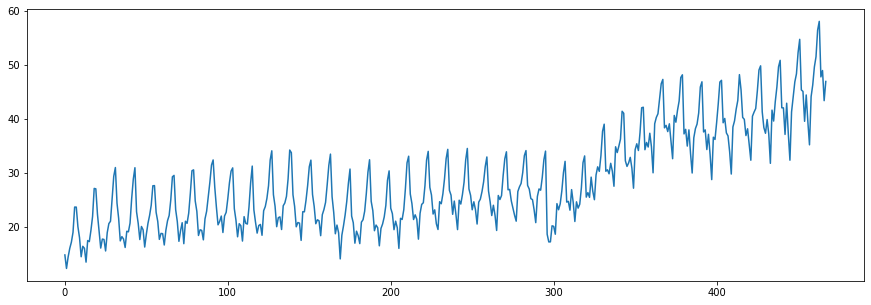

In [12]:
jfk = pd.read_csv("/home/aumaron/Desktop/other_projects/datasets/time_series/jfk_passengers.csv")
print(jfk)
figure = plt.figure(figsize=(15,5))
plt.plot(jfk["t"], jfk["Number of Passengers"]/100000)

BreakPoints for min_size 10.0 ->  [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 455, 468]


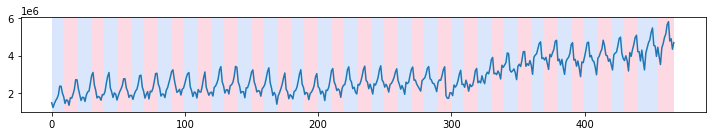

BreakPoints for min_size 20.0 ->  [20, 45, 70, 105, 140, 165, 190, 210, 230, 250, 280, 300, 320, 345, 380, 400, 420, 440, 468]


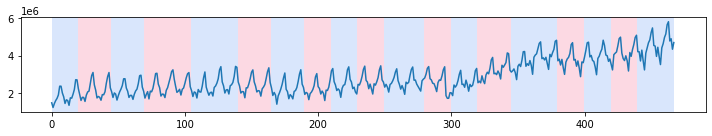

BreakPoints for min_size 30.0 ->  [45, 75, 105, 140, 190, 225, 260, 295, 345, 380, 430, 468]


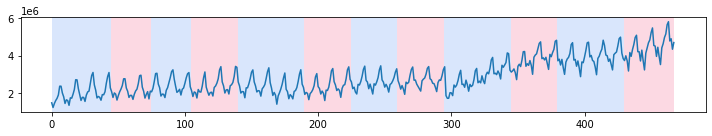

BreakPoints for min_size 40.0 ->  [45, 105, 165, 210, 250, 295, 335, 380, 420, 468]


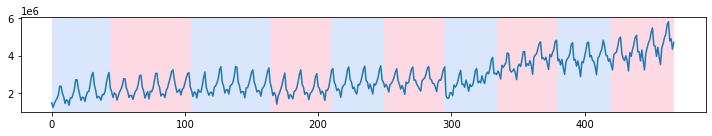

BreakPoints for min_size 50.0 ->  [55, 105, 165, 220, 295, 380, 468]


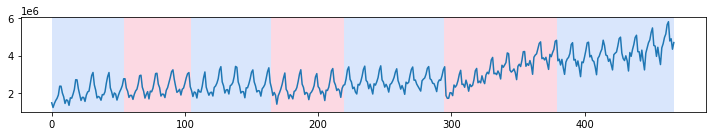

In [13]:
for size in np.linspace(10, 50, 5):
    get_changepoints(signal = jfk["Number of Passengers"].values,
                    minimum_size=size)

BreakPoints for min_size 40 ->  [45, 105, 165, 210, 250, 295, 335, 380, 420, 468]


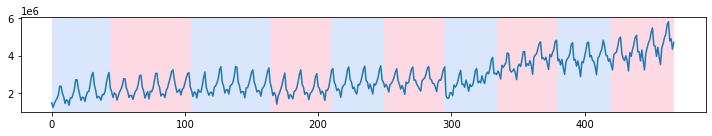

In [14]:
# min_size=30
lin_sig, change_points = get_changepoints(signal=jfk["Number of Passengers"].values, minimum_size=40)

Coefficients for 0 to 45 -> [17008.76996047]
Angle for 0 to 45 -> [89.9966314]
Intercept for 0 to 45 -> 1630473.3131313133

Coefficients for 46 to 105 -> [9457.39795441]
Angle for 46 to 105 -> [89.9939417]
Intercept for 46 to 105 -> 1570228.7724137933

Coefficients for 106 to 165 -> [7184.46773816]
Angle for 106 to 165 -> [89.99202505]
Intercept for 106 to 165 -> 1443451.3537112796

Coefficients for 166 to 210 -> [4899.82135307]
Angle for 166 to 210 -> [89.98830656]
Intercept for 166 to 210 -> 1284510.5158562372

Coefficients for 211 to 250 -> [7577.24898785]
Angle for 211 to 250 -> [89.99243845]
Intercept for 211 to 250 -> 835248.7402159243

Coefficients for 251 to 295 -> [5897.8068358]
Angle for 251 to 295 -> [89.99028524]
Intercept for 251 to 295 -> 1037232.2167723756

Coefficients for 296 to 335 -> [34238.44919028]
Angle for 296 to 335 -> [89.99832657]
Intercept for 296 to 335 -> -8167520.380026994

Coefficients for 336 to 380 -> [24885.81451727]
Angle for 336 to 380 -> [89.9976976

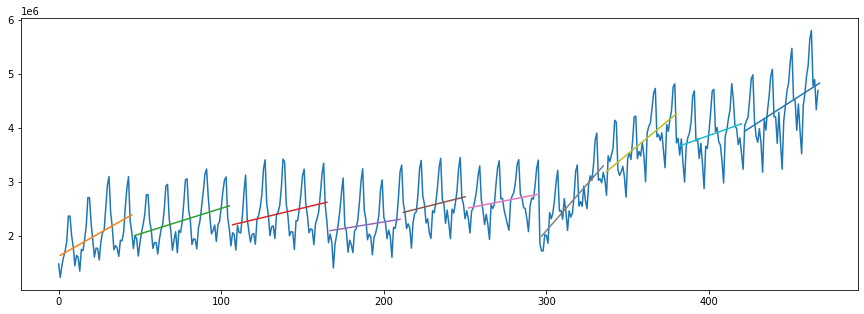

In [15]:
# Fitting regression lines between change points
plt.figure(figsize=(15,5))
plt.plot(jfk["t"], jfk["Number of Passengers"])

predi = {}
mse_ = {}
prev_change = 0
for i, each_change_point in enumerate(change_points):
    if prev_change == 0:
        pred, coef, intercept = regression_between_points(signal=lin_sig, lower_limit=prev_change, upper_limit=each_change_point)
        predi.update({f"pred{i}": pred})
        plt.plot(lin_sig[:each_change_point, 2], pred)
        print(f"Coefficients for {prev_change} to {each_change_point} -> {coef}")
        print(f"Angle for {prev_change} to {each_change_point} -> {np.arctan(coef)*180/np.pi}")
        print(f"Intercept for {prev_change} to {each_change_point} -> {intercept}\n")
        prev_change = each_change_point + 1
        
        
    else:
        pred, coef, intercept = regression_between_points(signal=lin_sig, lower_limit=prev_change, upper_limit=each_change_point)
        predi.update({f"pred{i}": pred})
        plt.plot(lin_sig[prev_change:each_change_point, 2], pred)
        print(f"Coefficients for {prev_change} to {each_change_point} -> {coef}")
        print(f"Angle for {prev_change} to {each_change_point} -> {np.arctan(coef)*180/np.pi}")
        print(f"Intercept for {prev_change} to {each_change_point} -> {intercept}\n")
        prev_change = each_change_point + 1


CostAR model
lag=2-5
reduce to 1-split or 2-split